First, import the gPhoton modules we will be using.  We'll also import the datetime module so we can keep track of the (approximate) start and stop times for our commands.

In [2]:
from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap
import datetime

We will now define some parameters for CR Draconis, including the coordinates of the target and the aperture sizes (always in degrees!)  The "step_size" is the bin size we'd like to make for our light curves, in seconds.  Similarly, "img_step_size" is the step size we'd like to use for our image cube.  The "img_size" is the size on the sky, in degrees, for the coadd image and/or image cube we will be making.

In [3]:
target = 'cr_dra'
ra = 244.27246917
dec = 55.26919386
step_size = 10.
img_step_size = 30.
img_size = [0.1, 0.1]
phot_rad = 0.0045
ap_in = 0.0050
ap_out = 0.0060

First we will run gFind to determine how much data exists in the database.  We are going to focus on the NUV band for now, since in general, targets will have as much or more NUV data than FUV data.  You can, however, specify 'band="both"' to query available data in both bands with one command.  We use the 'exponly=True' option to minimize the amount of information printed to the screen after gFind finishes.  **NOTE: This can take a few minutes to run, so be patient!**

In [4]:
print("Starting gFind for CR Draconis...")
print(datetime.datetime.now())
exp_data = gFind(band="NUV", skypos=[ra, dec], exponly=True)
print(datetime.datetime.now())
print("Completed gFind for CR Draconis.")

Starting gFind for CR Draconis...
2020-07-23 21:19:42.283397
NUV: 49919.0s (raw) in 44 exposures.
2020-07-23 21:23:10.086512
Completed gFind for CR Draconis.


The return structure is a dictionary that contains one or two dictionaries for each band.  In our case, there is one dict for the NUV band.  The dict for each band contains the closest MCAT source (from the GALEX merged catalog of sources), a list of start times, a list of stop times, and a total exposure time.  The start and stop times are in "GALEX time", which is Unix time - 315964800 seconds.  The start and stop times correspond to individual "visits" to the target throughtout the mission.  Since we just want to know how much total time is available, let's print out the total exposure time.

In [5]:
print(exp_data['NUV']['expt'])

49919.0


We can loop over the start and stop times and see where the largest continuous data sets are.

In [6]:
for tstart, tstop in zip(exp_data['NUV']['t0'], exp_data['NUV']['t1']):
        print(tstart, tstop, tstop-tstart)

768413051.995 768413156.995 105.0
773815967.995 773816472.995 505.0
799083974.995 799085580.995 1606.0
799214245.995 799214801.995 556.0
799279196.995 799280851.995 1655.0
799415257.995 799415364.995 107.0
802302812.995 802303989.995 1177.0
802439100.995 802440088.995 988.0
806326407.995 806327771.995 1364.0
806427020.995 806428340.995 1320.0
806533534.995 806534830.995 1296.0
806669721.995 806670916.995 1195.0
806793869.995 806795186.995 1317.0
806799791.995 806801104.995 1313.0
837271255.995 837272711.995 1456.0
837390036.995 837391026.995 990.0
837407997.995 837408083.995 86.0
837443507.995 837443594.995 87.0
837496199.995 837497522.995 1323.0
925883687.995 925884955.995 1268.0
926090824.995 926092123.995 1299.0
926262407.995 926263780.995 1373.0
926428044.995 926429498.995 1454.0
926599566.995 926601106.995 1540.0
929598469.995 929599902.995 1433.0
929775990.995 929777331.995 1341.0
929935826.995 929937043.995 1217.0
930113448.995 930114550.995 1102.0
930296973.995 930298044.995 10

There's a lot of data here!  Let's make a deep coadd image of this target, as well as an image cube using 30-second slices.  In the interest of time, we'll just choose one visit from above.  We set "verbose=3" so that we can monitor to make sure gMap is running.  When finished, we will have two FITS files created on our machine.

In [7]:
print("Starting gMap for CR Draconis...")
print(datetime.datetime.now())
gMap(band="nuv", skypos=[ra, dec], stepsz=img_step_size, skyrange=img_size,
         cntfile=target+'_cube.fits', cntcoaddfile=target+'_coadd.fits', verbose=3,
         trange=[799279196., 799280852.], overwrite=True)
print(datetime.datetime.now())
print("Completed gMap for CR Draconis.")

Starting gMap for CR Draconis...
2020-07-23 21:23:10.205583
[[7.99279196e+08 7.99280852e+08]]
Populating FITS header.Writing image to cr_dra_cube.fits
[[7.99279196e+08 7.99280852e+08]]
Coadding across [[7.99279196e+08 7.99280852e+08]]
Populating FITS header.Writing image to cr_dra_coadd.fits
2020-07-23 21:24:25.001252
Completed gMap for CR Draconis.


You can open the images using your favorite FITS viewer, for example, ds9.  If using ds9, I recommend changing the scaling to "zscale", the scale to "log", and the scale parameters min and max to be 0. and 100.  If you look at the image cube and pan through the frames, you'll notice a rather large flare occurs roughly halfway through the frames.

Next we'd like to create a light curve CSV file.  Once again, in the interest of time, let's just do one visit.  Our photometric aperture is "phot_rad", while the inner and outer annulus are "ap_in" and "ap_out", **always in degrees**.  **NOTE: This can take a few minutes to complete.**

In [8]:
print("Starting gAperture for CR Draconis...")
print(datetime.datetime.now())
photon_events = gAperture(band='NUV', skypos=[ra, dec], stepsz=step_size, radius=phot_rad,
                             annulus=[ap_in, ap_out], verbose=3, csvfile=target+"_lc.csv",
                             trange=[799279196., 799280852.], overwrite=True)
print(datetime.datetime.now())
print("Completed gAperture for CR Draconis.")

Starting gAperture for CR Draconis...
2020-07-23 21:24:25.017496
Using v1.28.9 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [244.27246917, 55.26919386]
 tranges: [799279196.0, 799280852.0]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  10.0
 csvfile: cr_dra_lc.csv
 verbose: 3
Building output data frame.2020-07-23 21:32:56.947506
Completed gAperture for CR Draconis.


Now we can make a quick plot of the light curve.  We'll import matplotlib, as well as a utility function in gPhoton to quickly read in light curve files from gPhoton.

In [9]:
from gPhoton.gphoton_utils import read_lc
import matplotlib.pyplot as pyp

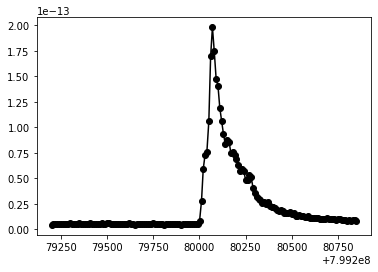

In [10]:
data = read_lc(target+"_lc.csv")
pyp.plot(data['t_mean'], data['flux_bgsub'], '-ko')
pyp.show()

In [11]:
data

,t0,t1,t_mean,t0_data,t1_data,cps_bgsub,cps_bgsub_err,flux_bgsub,flux_bgsub_err,mag_bgsub,...,bg,mcat_bg,responses,detxs,detys,detrad,racent,deccent,q_mean,flags
0,7.992792e+08,7.992792e+08,7.992792e+08,7.992792e+08,7.992792e+08,22.066239,1.747303,4.545645e-15,3.599444e-16,16.720679,...,9.575455,6.567362,0.864097,557.667603,351.898132,164.841932,244.272733,55.268601,13.962733,0.0
1,7.992792e+08,7.992792e+08,7.992792e+08,7.992792e+08,7.992792e+08,25.327842,1.768687,5.217535e-15,3.643495e-16,16.571005,...,11.240854,7.299499,0.857599,557.122131,352.993042,164.003104,244.272343,55.268580,13.812808,0.0
2,7.992792e+08,7.992792e+08,7.992792e+08,7.992792e+08,7.992792e+08,22.977048,1.726581,4.733272e-15,3.556757e-16,16.676764,...,15.986762,7.305707,0.851742,557.386719,354.857574,163.732763,244.272661,55.268690,14.515958,0.0
3,7.992792e+08,7.992792e+08,7.992792e+08,7.992792e+08,7.992792e+08,24.390530,1.690254,5.024449e-15,3.481923e-16,16.611947,...,4.759684,7.305656,0.851039,558.671082,356.247406,164.592836,244.272638,55.268571,13.915344,0.0
4,7.992792e+08,7.992792e+08,7.992792e+08,7.992792e+08,7.992792e+08,26.353563,1.764697,5.428834e-15,3.635276e-16,16.527902,...,6.331693,7.311647,0.874629,560.543335,357.203125,166.149736,244.272601,55.268690,13.938389,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,7.992808e+08,7.992808e+08,7.992808e+08,7.992808e+08,7.992808e+08,43.020352,2.222874,8.862192e-15,4.579121e-16,15.995815,...,4.756791,7.314799,0.864787,566.581909,362.663544,170.714801,244.272699,55.268451,12.800595,0.0
162,7.992808e+08,7.992808e+08,7.992808e+08,7.992808e+08,7.992808e+08,38.530672,2.136797,7.937318e-15,4.401802e-16,16.115484,...,9.639858,7.306814,0.861270,570.118958,361.018616,174.527958,244.272619,55.268538,12.476974,0.0
163,7.992808e+08,7.992808e+08,7.992808e+08,7.992808e+08,7.992808e+08,43.568285,2.265501,8.975067e-15,4.666933e-16,15.982074,...,9.652974,7.305402,0.869687,572.304260,357.790344,177.399022,244.272697,55.268494,12.777456,0.0
164,7.992808e+08,7.992808e+08,7.992808e+08,7.992808e+08,7.992808e+08,41.855772,2.214790,8.622289e-15,4.562467e-16,16.025612,...,7.951161,7.294177,0.873126,572.704895,353.847565,178.765288,244.272750,55.268544,12.918674,0.0


This is the same flare as reported in Welsh et al. (2006): http://adsabs.harvard.edu/abs/2006A%26A...458..921W
If you are willing to wait longer and create a light curve across **all** the available data, you'll find several more flares of different durations and sizes.  You can see the one's we've found in the gPhoton intro. paper, Fig. 13: http://adsabs.harvard.edu/abs/2016ApJ...833..292M